
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Muy buen trabajo Fany! 

<div class="alert alert-block alert-danger">
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Solo fala que hagas un ajuste de hiperparámetros. Aunque llegas al rendimiento esperado, el ajuste es una herramienta que necesitarás en futuros sprints (y en la vida como data scientist), por lo que es importante validar que tienes este conocimiento. 
    
</div>

Por lo demás, tienes un excelente trabajo!
    
</div>


<div class="alert alert-block alert-success"> 
<b>CCOMENTARIO GENERAL  #2</b> <a class="tocSkip"></a>

Felicidades Fany! Tu trabajo es excelente 

Has completado todos los items necesarios para aprobar la entrega.

</div>

# Descripción del proyecto
La compañía móvil Megaline no está satisfecha al ver que muchos de sus clientes utilizan planes heredados. Quieren desarrollar un modelo que pueda analizar el comportamiento de los clientes y recomendar uno de los nuevos planes de Megaline: Smart o Ultra.

Tienes acceso a los datos de comportamiento de los suscriptores que ya se han cambiado a los planes nuevos (del proyecto del sprint de Análisis estadístico de datos). Para esta tarea de clasificación debes crear un modelo que escoja el plan correcto. Como ya hiciste el paso de procesar los datos, puedes lanzarte directo a crear el modelo.

Desarrolla un modelo con la mayor exactitud posible. En este proyecto, el umbral de exactitud es 0.75. Usa el dataset para comprobar la exactitud.

In [64]:
# Importar librerías.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [65]:
# Leer dataset
df = pd.read_csv('/datasets/users_behavior.csv')

In [66]:
# Exploración de datos
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


<div class="alert alert-block alert-info"> <b>Nuevo comentario:</b> <a class="tocSkip"></a> </div>

No es necesario hacer ningún ajuste a los datos porque los que nos interesan, columnas: is_ultra, calls y minutes están en el tipo correcto.

In [68]:
print(df.shape)

(3214, 5)


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo! Has utilizado métodos como _info()_, _head()_ o _describe()_ para analizar los datos. Estos métodos te permiten entender la estructura de los datos, los tipos de variables, la presencia de valores faltantes y obtener una descripción estadística general.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda dejar comentarios sobre tus análisis.

</div>
    
</div>

# Segmentar datos fuente

En ese caso, los datos fuente deben dividirse en tres partes: entrenamiento, validación y prueba. Usualmente, el tamaño del conjunto de validación y del conjunto de prueba son iguales. Este escenario nos da una proporción de 3:1:1 (un 60 % para el conjunto de entrenamiento y un 20 % para los conjuntos de validación y prueba).

In [69]:
# Separar características y variable objetivo
X = df.drop(["is_ultra"], axis=1)
y = df["is_ultra"]

In [70]:
# Dividir en conjunto de entrenamiento (60%) y test+validación (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=54321)

# Dividir test+validación en test (20%) y validación (20%)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=54321)

# Verificar tamaños de los conjuntos
print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de validación: {X_valid.shape}")
print(f"Tamaño de prueba: {X_test.shape}")

Tamaño de entrenamiento: (1928, 4)
Tamaño de validación: (643, 4)
Tamaño de prueba: (643, 4)


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente! Has dividido correctamente los datos en tres conjuntos, _train_, _validation_ y _test_, utilizando correctamente _train_test_split_ dos veces para dividir los datos.

Además, el tamaño elegido para los conjuntos es el esperado.

</div>

# Prueba de modelos de clasificación: Árbol de decisión, Bosque aleatorio y Regresión logística

**ÁRBOL DE DECISIÓN.**

* Entrenamiento - árbol de decisión.

<div class="alert alert-block alert-info"> <b>Ajustes de hiperparámetros:</b> <a class="tocSkip"></a> </div>

In [71]:
# Creación del modelo - AJUSTE DE HIPERPARAMETROS 1
tree_model0 = DecisionTreeClassifier(max_depth=10, random_state=54321)

In [72]:
# Creación del modelo - AJUSTE DE HIPERPARAMETROS 2
tree_model00 = DecisionTreeClassifier(max_depth=2, random_state=54321)

In [73]:
# Creación del modelo - AJUSTE DE HIPERPARAMETROS 3
tree_model = DecisionTreeClassifier(max_depth=3, random_state=54321)

In [74]:
# Entrenamiento - HIPERPARAMETROS 1
tree_model0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=54321)

In [75]:
# Entrenamiento - HIPERPARAMETROS 2
tree_model00.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=54321)

In [76]:
# Entrenamiento  HIPERPARAMETROS 3
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=54321)

* Evaluación del modelo - árbol de decisión

In [77]:
#Cálculo de las predicciones en Train, Valid - 1
y_train_pred0 = tree_model0.predict(X_train)
y_valid_pred0 = tree_model0.predict(X_valid) ##
#y_test_pred = tree_model.predict(X_test)

In [78]:
#Cálculo de las predicciones en Train, Valid - 2
y_train_pred00 = tree_model00.predict(X_train)
y_valid_pred00 = tree_model00.predict(X_valid)

In [79]:
#Cálculo de las predicciones en Train, Valid - 3
y_train_pred = tree_model.predict(X_train)
y_valid_pred = tree_model.predict(X_valid)

In [80]:
#Calculo el accuracy en Train 1
train_accuracy0 = accuracy_score(y_train,y_train_pred0)

#Calculo el accuracy en Valid 1
valid_accuracy0 = accuracy_score(y_valid,y_valid_pred0) ##

print('El accuracy en train es:', train_accuracy0)
print('El accuracy en valid es:', valid_accuracy0) ##

El accuracy en train es: 0.883298755186722
El accuracy en valid es: 0.7822706065318819


<div class="alert alert-block alert-info"> <b>Observaciones añadidas:</b> <a class="tocSkip"></a> </div>

Observaciones con los primeros ajustes de los hiperparáetro: La caída del rendimiento en validación indica que el modelo está algo ajustado a los datos de entrenamiento.

In [81]:
#Calculo el accuracy en Train 2
train_accuracy00 = accuracy_score(y_train,y_train_pred00)

#Calculo el accuracy en Valid 2
valid_accuracy00 = accuracy_score(y_valid,y_valid_pred00) ##

print('El accuracy en train es:', train_accuracy00)
print('El accuracy en valid es:', valid_accuracy00) ##

El accuracy en train es: 0.7847510373443983
El accuracy en valid es: 0.7418351477449455


<div class="alert alert-block alert-info"> <b>Observaciones añadidas:</b> <a class="tocSkip"></a> </div>

Ligero subreajuste con estos resultados. La diferencia entre entrenamiento (78%) y validación (74%) sugiere que el modelo podría estar capturando detalles específicos de los datos de entrenamiento que no generalizan tan bien.

In [82]:
#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train,y_train_pred)

#Calculo el accuracy en Valid
valid_accuracy = accuracy_score(y_valid,y_valid_pred) ##

print('El accuracy en train es:', train_accuracy)
print('El accuracy en valid es:', valid_accuracy) ##

El accuracy en train es: 0.7992738589211619
El accuracy en valid es: 0.7651632970451011


<div class="alert alert-block alert-info"> <b>Observaciones añadidas</b> <a class="tocSkip"></a> </div>

Existe un mejor equilibrio entre el resultado de entrenamiento (79%) y validación (76%): más adaptado al entrenamiento.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has entrenado el modelo únicamente con el conjunto de entrenamiento, lo que es exactamente lo que se debe hacer. Este conjunto contiene los datos con los que el modelo aprende los patrones, y no debe utilizar otros conjuntos durante el entrenamiento.

Luego, has validado correctamente el modelo utilizando solo el conjunto de validación. Esta es una práctica esencial para ajustar los hiperparámetros y comparar diferentes modelos sin introducir sesgos.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda que el conjunto de test debe usarse únicamente al final, después de seleccionar el mejor modelo, para medir su rendimiento real. Revisa tu flujo de trabajo para garantizar que el testeo no afecte la comparación previa de modelos.

</div>

</div>

<div class="alert alert-block alert-info"> <b>Observaciones editadas:</b> <a class="tocSkip"></a> </div>

Determiné que en el conjunto de Entrenamiento (accuracy 79%) el mejor número para el hiperparámetro max_depth sea el 3 (max_depth=3), de está manera tiene una buena capacidad de generalización. Esto es muy parecido al conjunto de validación. En el conjunto de prueba 81%, lo que sugiere que el modelo generaliza mejor en datos no vistos.


**BOSQUE ALEATORIO**

* Entrenamiento - bosque aleatorio

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Genial! Consideraste varios modelos para el ajuste. Probar diferentes enfoques es clave en el aprendizaje automático, ya que diferentes modelos pueden capturar patrones de forma distinta. Comparar varios modelos te asegura que encuentres el que mejor se ajusta a los datos.

</div>

<div class="alert alert-block alert-info"> <b>Ajustes de hiperparámetros:</b> <a class="tocSkip"></a> </div>

In [83]:
#Creacion del modelo - AJUSTE 1
random_forest0 = RandomForestClassifier(n_estimators=50, random_state=54321)

In [84]:
#Creacion del modelo - AJUSTE 2
random_forest00 = RandomForestClassifier(n_estimators=5, random_state=54321)

In [85]:
#Creacion del modelo - AJUSTE 3
random_forest = RandomForestClassifier(n_estimators=20, random_state=54321)

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Buen trabajo Fany! Sin embargo, notarás que no es muy eficiente probar así los diferentes valores. 

Puedes utilizar un bucle _for_ para iterar en los diferentes valores que quieras probar o utilizar métodos como GridSearch para hacer una búsqueda más completa.

</div>

In [86]:
#Entrenamiento 1
random_forest0.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=54321)

In [87]:
#Entrenamiento 2
random_forest00.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=54321)

In [88]:
#Entrenamiento 3
random_forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=54321)

In [89]:
#Calculo de las predicciones en Train Y Valid 1
y_train_pred0 = random_forest0.predict(X_train)
y_valid_pred0 = random_forest0.predict(X_valid) ##

In [90]:
#Calculo de las predicciones en Train Y Valid 2
y_train_pred00 = random_forest00.predict(X_train)
y_valid_pred00 = random_forest00.predict(X_valid) ##

In [91]:
#Calculo de las predicciones en Train Y Valid 3
y_train_pred = random_forest.predict(X_train)
y_valid_pred = random_forest.predict(X_valid) ##

<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Veo que no realizas un ajustaste de hiperparámetros en ningún modelo. Para esta entrega, se pide ajustar al menos tres hiperparámetros para optimizar el rendimiento de cada modelo. Intenta explorar más opciones de ajuste.

</div>

* Evaluación del modelo - bosque aleatorio

In [92]:
#Calculo el accuracy en Train
train_accuracy0 = accuracy_score(y_train,y_train_pred0)

#Calculo el accuracy en Valid
valid_accuracy0 = accuracy_score(y_valid,y_valid_pred0) ##

print('El accuracy en train es:', train_accuracy0)
print('El accuracy en valid es:', valid_accuracy0) ##

El accuracy en train es: 0.9984439834024896
El accuracy en valid es: 0.7807153965785381


In [93]:
#Calculo el accuracy en Train 2
train_accuracy00 = accuracy_score(y_train,y_train_pred00)

#Calculo el accuracy en Valid 2
valid_accuracy00 = accuracy_score(y_valid,y_valid_pred00) ##

print('El accuracy en train es:', train_accuracy00)
print('El accuracy en valid es:', valid_accuracy00) ##

El accuracy en train es: 0.9704356846473029
El accuracy en valid es: 0.7293934681181959


In [94]:
#Calculo el accuracy en Train 3
train_accuracy = accuracy_score(y_train,y_train_pred)

#Calculo el accuracy en Valid 3
valid_accuracy = accuracy_score(y_valid,y_valid_pred) ##

print('El accuracy en train es:', train_accuracy)
print('El accuracy en valid es:', valid_accuracy) ##

El accuracy en train es: 0.9906639004149378
El accuracy en valid es: 0.7713841368584758


<div class="alert alert-block alert-info"> <b>Observaciones editadas:</b> <a class="tocSkip"></a> </div>
El alto rendimiento en entrenamiento en todos los ajustes de hiperparámetros (>97%) y la gran caída en validación (72% - 78%) sugieren que el modelo está memorizando los datos de entrenamiento en lugar de generalizar bien (alto sobreajuste). Quizá se deba al dataset que es relativamente pequeño.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has documentado los resultados de manera clara. Además, tus conclusiones son correctas!

</div>

**REGRESIÓN LOGÍSTICA**

* Entrenamiento - regresión logística

<div class="alert alert-block alert-info"> <b>Ajustes a los hiperparámetros: No se observó cambio alguno.</b> <a class="tocSkip"></a> </div>

In [95]:
# Creación del modelo. 1
model0 = LogisticRegression(random_state=54321, C=150)

In [96]:
# Creación del modelo. 2
model00 = LogisticRegression(random_state=54321, C=25)

In [97]:
# Creación del modelo. 3
model = LogisticRegression(random_state=54321, C=9)

In [98]:
# Entrenamiento 1
model0.fit(X_train, y_train)

LogisticRegression(C=150, random_state=54321)

In [99]:
# Entrenamiento 2
model00.fit(X_train, y_train)

LogisticRegression(C=25, random_state=54321)

In [100]:
# Entrenamiento 3
model.fit(X_train, y_train)

LogisticRegression(C=9, random_state=54321)

In [101]:
#Calculo de las predicciones en Train, Valid 1
y_train_pred0 = model0.predict(X_train)
y_valid_pred0 = model0.predict(X_valid)

In [102]:
#Calculo de las predicciones en Train, Valid 2
y_train_pred00 = model00.predict(X_train)
y_valid_pred00 = model00.predict(X_valid)

In [103]:
#Calculo de las predicciones en Train, Valid 3
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

* Evaluación del modelo - regresión logística

In [104]:
#Calculo el accuracy en Train 1
train_accuracy0 = accuracy_score(y_train,y_train_pred0)

#Calculo el accuracy en Valid 1
valid_accuracy0 = accuracy_score(y_valid,y_valid_pred0) ##

print('El accuracy en train es:', train_accuracy0)
print('El accuracy en valid es:', valid_accuracy0) ##

El accuracy en train es: 0.7152489626556017
El accuracy en valid es: 0.6749611197511665


In [105]:
#Calculo el accuracy en Train 2
train_accuracy00 = accuracy_score(y_train,y_train_pred00)

#Calculo el accuracy en Valid 2
valid_accuracy00 = accuracy_score(y_valid,y_valid_pred00) ##

print('El accuracy en train es:', train_accuracy00)
print('El accuracy en valid es:', valid_accuracy00) ##

El accuracy en train es: 0.7152489626556017
El accuracy en valid es: 0.6749611197511665


In [106]:
#Calculo el accuracy en Train 3
train_accuracy = accuracy_score(y_train,y_train_pred)

#Calculo el accuracy en Valid
valid_accuracy = accuracy_score(y_valid,y_valid_pred) ##

print('El accuracy en train es:', train_accuracy)
print('El accuracy en valid es:', valid_accuracy) ##

El accuracy en train es: 0.7152489626556017
El accuracy en valid es: 0.6749611197511665


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo Fany! El trabajo realizado es muy correcto. Además, es muy bueno que tengas en cuenta el sobreajuste de los modelos, ya que es algo que queremos evitar a toda costa.

</div>

La probabilidad de sobreajuste será baja. El rendimiento en el conjunto de datos de entrenamiento es más estable.

<div class="alert alert-block alert-info"> <b>Nuevos comentarios + calidad del modelo usando el conjunto de prueba</b> <a class="tocSkip"></a> </div>

# Calidad del modelo usando el conjunto de prueba

Teniendo en cuenta que elegí el modelo de árbol de decisión ya que tiene una buena capacidad de generalización.

In [107]:
#Cálculo de las predicciones en Valid y Test
y_valid_pred = tree_model.predict(X_valid) ##
y_test_pred = tree_model.predict(X_test)

In [108]:
#Calculo el accuracy en Valid
valid_accuracy = accuracy_score(y_valid,y_valid_pred) ##

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test,y_test_pred)


print('El accuracy en valid es:', valid_accuracy) ##
print('El accuracy en test es:', test_accuracy)

El accuracy en valid es: 0.7651632970451011
El accuracy en test es: 0.8164852255054432


<div class="alert alert-block alert-info"> <b>Observaciones</b> <a class="tocSkip"></a> </div>
El hecho de que la prueba (test) tenga un desempeño similar o incluso mejor a la validación sugiere que la métrica es estable y no está sesgada. En el conjunto de prueba 81%, lo que sugiere que el modelo generaliza mejor en datos no vistos.

# Pruebas de cordura en modelos de clasificación.

In [109]:
# Comparar con una predicción aleatoria
dummy = DummyClassifier(strategy="most_frequent")  # Siempre predice la clase más común
dummy.fit(X_train, y_train)
dummy_accuracy = dummy.score(X_valid, y_valid)

print(f"Precisión del modelo dummy: {dummy_accuracy:.4f}")

Precisión del modelo dummy: 0.6516


Este modelo dummy tiene un accuracy de 65.16%, lo que significa que cualquier modelo que supere este valor está haciendo un mejor trabajo que una estrategia trivial.

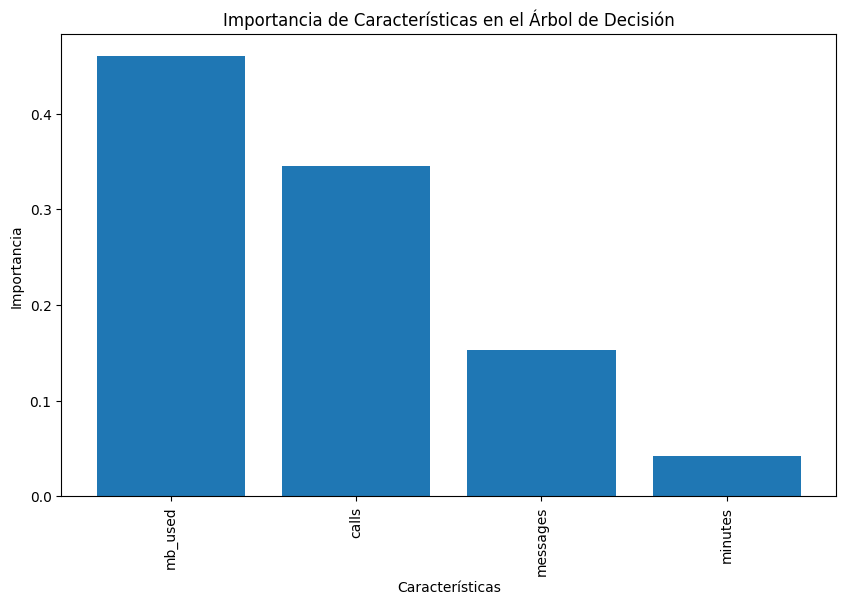

In [110]:
# Importancia de las características en el modelo de Árbol de Decisión
importances = tree_model.feature_importances_
features = X_train.columns  # Nombres de las variables

# Ordenar por importancia
indices = np.argsort(importances)[::-1]

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.title("Importancia de Características en el Árbol de Decisión")
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Gran trabajo!! Muy buen análisis de importancia de características.

</div>

# Conclusiones:



<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente! Has logrado una precisión (_accuracy_) superior a 0.75, tal como se pide.

Además, todo tu trabajo es super claro y ordenado.

</div>

Todos los modelos que se probaron son mejores que el modelo dummy. Destacando los resultados: El Árbol de Decisión sigue siendo el mejor en test (81.64%), el Bosque Aleatorio tuvo mucho sobreajuste. La Regresión Logística generaliza bien, pero con menor precisión que el Árbol de decisión. Por lo que el modelo de Árbol de Decisión es el que mejor generaliza y supera ampliamente el modelo de cordura. Parece la mejor opción hasta ahora.

Conectando los resultados con los objetivos del proyecto, el árbol de decisión tiene mejor capacidad para clasificar correctamente a los clientes en los planes Smart o Ultra. Podemos observar que con base a la variable target: is_ultra, las carácterísticas más importantes para predecir si un cliente debe recibir el plan Smart o Ultra son: 

* mb_used (Uso de datos móviles) aproximadamente 60% de importancia, siendo el factor principal que distingue a los clientes de cada plan, y 
* calls (Número de llamadas) aproximadamente 40% de importancia, si un cliente hace muchas llamadas, podría estar más inclinado hacia un plan con minutos incluidos o tarifas más convenientes para llamadas.